In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import log_loss
from mlxtend.evaluate import bias_variance_decomp

In [2]:
df = pd.read_csv('clean_kaggle_data_2022.csv', encoding= 'unicode_escape')
df

/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_45071/764404354.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_kaggle_data_2022.csv', encoding= 'unicode_escape')


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,540,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
8133,603,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8134,557,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
8135,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"


In [3]:
ordinal_df = df.iloc[1:,:]
ordinal_df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"
5,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, OEEReilly...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,13.0,"200,000-299,999"


## 1. Data cleaning

### Drop columns for multiple choice - other
For multiple choice questions, there's a column for people choose 'other' on each question, these columns are not useful in analysis since they are not categorical - they do not classify the person into any type, so I went through the columns to drop them.

In [4]:
for i in df.columns:
    if (pd.isna(df.loc[0,i])):
        # Q29 description is nan, cause error
        continue
    elif ('Other' in df.loc[0,i]):
        ordinal_df = ordinal_df.drop([i], axis=1)

In [5]:
ordinal_df.head(2)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q29_Encoded,Q29_buckets
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,10.0,"100,000-124,999"


### Encode multi-choice questions

Find the multiple-choice questions, for each column of each choice, encode them as selected->1, not selected->0.

In [6]:
mul_choice = []
for i in ordinal_df.columns:
    if ('_' in i):
        mul_choice.append(i)
mul_choice.remove('Q29_Encoded')
mul_choice.remove('Q29_buckets')
mul_encode = pd.get_dummies(ordinal_df[mul_choice])
mul_encode.head(2)

,Q6_1_Coursera,Q6_2_edX,Q6_3_Kaggle Learn Courses,Q6_4_DataCamp,Q6_5_Fast.ai,Q6_6_Udacity,Q6_7_Udemy,Q6_8_LinkedIn Learning,"Q6_9_Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",Q6_10_University Courses (resulting in a university degree),...,"Q44_2_Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Q44_3_Reddit (r/machinelearning, etc)","Q44_4_Kaggle (notebooks, forums, etc)","Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)","Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q44_7_Podcasts (Chai Time Data Science, OEEReilly Data Show, etc)","Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)","Q44_9_Journal Publications (peer-reviewed journals, conference proceedings, etc)","Q44_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q44_11_None
1,1,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,1,1,0,0,0,1,1,0,0,0,...,1,1,0,0,1,0,1,0,0,0


In [7]:
ordinal_df = ordinal_df.drop(mul_choice, axis=1)
ordinal_df = pd.concat([ordinal_df,mul_encode], axis=1)
ordinal_df.head(2)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q8,Q9,Q11,Q16,Q22,...,"Q44_2_Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Q44_3_Reddit (r/machinelearning, etc)","Q44_4_Kaggle (notebooks, forums, etc)","Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)","Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q44_7_Podcasts (Chai Time Data Science, OEEReilly Data Show, etc)","Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)","Q44_9_Journal Publications (peer-reviewed journals, conference proceedings, etc)","Q44_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q44_11_None
1,851,55-59,Man,France,No,Some college/university study without earning ...,NaN,10-20 years,1-2 years,Huggingface Models,...,0,0,1,1,0,0,1,0,0,0
2,501,30-34,Man,Germany,No,BachelorEEs degree,NaN,10-20 years,4-5 years,Huggingface Models,...,1,1,0,0,1,0,1,0,0,0


### Q1(numerical) - drop

In [8]:
ordinal_df["Duration (in seconds)"].astype(float).describe()

count    8.136000e+03
mean     1.063510e+04
std      1.193662e+05
min      1.340000e+02
25%      4.480000e+02
50%      6.340000e+02
75%      9.880000e+02
max      2.512765e+06
Name: Duration (in seconds), dtype: float64

Here I drop column of duration since time finishing a survey is not really related the person's salary, moreover,  time is a very erratic variable, should be greatly affected by the environment and occasion the person open the survey. For example, the person can be disrupted half way and come back hours later to finish the survey...

In [9]:
ordinal_df = ordinal_df.drop(["Duration (in seconds)"], axis=1)

### Q2(categorical) - ordinal

Given numbers from low to high to represents increase of age.

In [10]:
# Differnt values in Q2
ordinal_df['Q2'].unique()

array(['55-59', '30-34', '70+', '40-44', '50-54', '25-29', '60-69',
       '35-39', '22-24', '45-49', '18-21'], dtype=object)

In [11]:
print('Number of missing values in Q2:',ordinal_df['Q2'].isnull().sum(),', thus no Null value need to be filled.')

Number of missing values in Q2: 0 , thus no Null value need to be filled.


In [12]:
# Encode based on diffent values
Q2_encode = {
    "18-21": 0,
    "22-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-69": 9,
    "70+": 10
}


In [13]:
ordinal_df['Q2'] = ordinal_df['Q2'].map(Q2_encode)
ordinal_df.head()

,Q2,Q3,Q4,Q5,Q8,Q9,Q11,Q16,Q22,Q23,...,"Q44_2_Email newsletters (Data Elixir, O'Reilly Data & AI, etc)","Q44_3_Reddit (r/machinelearning, etc)","Q44_4_Kaggle (notebooks, forums, etc)","Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)","Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q44_7_Podcasts (Chai Time Data Science, OEEReilly Data Show, etc)","Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)","Q44_9_Journal Publications (peer-reviewed journals, conference proceedings, etc)","Q44_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q44_11_None
1,8,Man,France,No,Some college/university study without earning ...,NaN,10-20 years,1-2 years,Huggingface Models,Data Scientist,...,0,0,1,1,0,0,1,0,0,0
2,3,Man,Germany,No,BachelorEEs degree,NaN,10-20 years,4-5 years,Huggingface Models,Software Engineer,...,1,1,0,0,1,0,1,0,0,0
3,10,Man,Australia,No,Doctoral degree,Yes,20+ years,5-10 years,NaN,Research Scientist,...,1,0,0,0,0,1,0,0,0,0
4,5,Man,United States of America,No,Doctoral degree,Yes,10-20 years,5-10 years,NaN,Developer Advocate,...,1,0,0,0,0,1,1,0,0,0
5,5,Man,United States of America,No,MasterEEs degree,Yes,10-20 years,5-10 years,NaN,Data Scientist,...,0,0,0,0,0,1,1,1,0,0


### Q3(categorical) - encode

Create dummy features for each categorical of gender.

Drop 'prefer not to say' and 'Prefer to self-describe' since they do not classify the person into any specific type.

In [14]:
# Differnt values in Q3
ordinal_df['Q3'].unique()

array(['Man', 'Woman', 'Prefer not to say', 'Prefer to self-describe',
       'Nonbinary'], dtype=object)

In [15]:
print('Number of missing values in Q3:',ordinal_df['Q3'].isnull().sum(),', thus no Null value need to be filled.')

Number of missing values in Q3: 0 , thus no Null value need to be filled.


In [16]:
ordinal_df = pd.get_dummies(ordinal_df, columns=['Q3'])
ordinal_df = ordinal_df.drop(['Q3_Prefer not to say','Q3_Prefer to self-describe'], axis=1)
ordinal_df.head(2)

,Q2,Q4,Q5,Q8,Q9,Q11,Q16,Q22,Q23,Q24,...,"Q44_5_Course Forums (forums.fast.ai, Coursera forums, etc)","Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Q44_7_Podcasts (Chai Time Data Science, OEEReilly Data Show, etc)","Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)","Q44_9_Journal Publications (peer-reviewed journals, conference proceedings, etc)","Q44_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q44_11_None,Q3_Man,Q3_Nonbinary,Q3_Woman
1,8,France,No,Some college/university study without earning ...,NaN,10-20 years,1-2 years,Huggingface Models,Data Scientist,Online Service/Internet-based Services,...,1,0,0,1,0,0,0,1,0,0
2,3,Germany,No,BachelorEEs degree,NaN,10-20 years,4-5 years,Huggingface Models,Software Engineer,Insurance/Risk Assessment,...,0,1,0,1,0,0,0,1,0,0


### Q4(categorical) - drop
Drop this column because there are too many categories in this variable.

In [17]:
print('Number of missing values in Q4:',ordinal_df['Q4'].isnull().sum(),', thus no Null value need to be filled.')
# Differnt values in Q4
ordinal_df['Q4'].value_counts()

Number of missing values in Q4: 0 , thus no Null value need to be filled.


India                                                   2328
United States of America                                1434
Other                                                    511
Japan                                                    333
Brazil                                                   292
Nigeria                                                  159
Spain                                                    140
United Kingdom of Great Britain and Northern Ireland     139
Mexico                                                   139
France                                                   137
South Korea                                              131
Pakistan                                                 131
Canada                                                   117
Turkey                                                   114
Taiwan                                                   110
China                                                    108
Indonesia               

In [18]:
ordinal_df = ordinal_df.drop(['Q4'], axis=1)

### Q5(categorical) - drop

Since all values in Q5 is no, we drop the column since it does not classify any population.

In [19]:
print('Number of missing values in Q4:',ordinal_df['Q5'].isnull().sum(),', thus no Null value need to be filled.')
# Differnt values in Q4
ordinal_df['Q5'].unique()

Number of missing values in Q4: 0 , thus no Null value need to be filled.


array(['No'], dtype=object)

In [20]:
ordinal_df = ordinal_df.drop(['Q5'], axis=1)

### Q8(categorical) - ordinal

Given numbers from low to high to represents increase level of education.

I classify 'No formal education past high school' and 'Some college/university study without earning a bachelors degree' into same education level, since their highst level is high school.

I droped observations for 'I prefer not to answer', since we cannot classify them into any category.

In [21]:
print('Number of missing values in Q8:',ordinal_df['Q8'].isnull().sum(),', thus no Null value need to be filled.')
# Differnt values in Q4
ordinal_df['Q8'].value_counts()

Number of missing values in Q8: 0 , thus no Null value need to be filled.


MasterEEs degree                                                      3567
BachelorEEs degree                                                    2005
Doctoral degree                                                          1349
I prefer not to answer                                                    426
Some college/university study without earning a bachelorEEs degree     304
Professional doctorate                                                    279
No formal education past high school                                      206
Name: Q8, dtype: int64

In [22]:
ordinal_df = ordinal_df.drop(index = ordinal_df.loc[ordinal_df['Q8']=='I prefer not to answer'].index)

In [23]:
Q8_encode = {
    'Bachelor\x81E\x80\x81Es degree': 1,
    'Master\x81E\x80\x81Es degree': 2,
    'Doctoral degree': 3,
    'Professional doctorate': 3,
    'No formal education past high school':0,
    'Some college/university study without earning a bachelor\x81E\x80\x81Es degree': 0,
}
ordinal_df['Q8'] = ordinal_df['Q8'].map(Q8_encode)

### Q9 (categorical) - drop

Since 1/3 of values are missing, I decided to drop this column.

In [24]:
print('Number of missing values in Q9:',ordinal_df['Q9'].isnull().sum())
# Differnt values in Q4
ordinal_df['Q9'].value_counts()

Number of missing values in Q9: 2515


Yes    2672
No     2523
Name: Q9, dtype: int64

In [25]:
ordinal_df = ordinal_df.drop(['Q9'], axis=1)

### Q11 & Q16 (categorical) - encode

Given numbers from low to high to represents increase level of experience(in years).

In [26]:
print('Number of missing values in Q11:',ordinal_df['Q11'].isnull().sum())
# Differnt values in Q11
ordinal_df['Q11'].unique()

Number of missing values in Q11: 0


array(['10-20 years', '20+ years', '5-10 years', '3-5 years', '1-3 years',
       '< 1 years', 'I have never written code'], dtype=object)

In [27]:
Q11_encode = {
    'I have never written code': 0,
    '< 1 years': 1,
    '1-3 years': 2,
    '3-5 years': 3,
    '5-10 years':4,
    '10-20 years': 5,
    '20+ years': 6
}
ordinal_df['Q11'] = ordinal_df['Q11'].map(Q11_encode)

I droped very minor observations for 'I prefer not to answer', since we cannot classify them into any category. 

In [28]:
print('Number of missing values in Q16:',ordinal_df['Q16'].isnull().sum())
# Differnt values in Q16
ordinal_df['Q16'].unique()

Number of missing values in Q16: 620


array(['1-2 years', '4-5 years', '5-10 years', '2-3 years',
       'Under 1 year', '3-4 years', '10-20 years',
       'I do not use machine learning methods', nan], dtype=object)

In [29]:
ordinal_df = ordinal_df.drop(index = ordinal_df.loc[pd.isna(ordinal_df.Q16.values)].index)

In [30]:
print('Number of missing values in Q16:',ordinal_df['Q16'].isnull().sum())

Number of missing values in Q16: 0


In [31]:
Q16_encode = {
    'I do not use machine learning methods': 0,
    'Under 1 year': 1,
    '1-2 years': 2,
    '2-3 years': 3,
    '3-4 years': 4,
    '4-5 years': 5,
    '5-10 years': 6,
    '10-20 years': 7
}
ordinal_df['Q16'] = ordinal_df['Q16'].map(Q16_encode)

### Q22 (categorical) - drop

Majority of Q22 answer is missing, drop the column.

In [32]:
print('Number of missing values in Q22:',ordinal_df['Q22'].isnull().sum())
# Differnt values in Q22
ordinal_df['Q22'].unique()

Number of missing values in Q22: 5554


array([' Huggingface Models ', nan, '  TensorFlow Hub ',
       ' Kaggle datasets ', ' ONNX models ', ' PyTorch Hub ', ' Timm ',
       'Other storage services (i.e. google drive)',
       ' NVIDIA NGC models  ', ' Jumpstart '], dtype=object)

In [33]:
ordinal_df = ordinal_df.drop(['Q22'], axis=1)

### Q23 (categorical) - encode

Create dummy features for each category(position).

Drop column of dummy var: 'Other' since they do not classify the person into any specific type.

In [34]:
print('Number of missing values in Q23:',ordinal_df['Q23'].isnull().sum())
# Differnt values in Q23
ordinal_df['Q23'].value_counts()

Number of missing values in Q23: 0


Data Scientist                                                      1607
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1130
Software Engineer                                                    798
Manager (Program, Project, Operations, Executive-level, etc)         634
Teacher / professor                                                  629
Research Scientist                                                   485
Other                                                                482
Machine Learning/ MLops Engineer                                     480
Engineer (non-software)                                              319
Data Engineer                                                        266
Statistician                                                          86
Data Architect                                                        76
Developer Advocate                                                    49
Data Administrator                                 

In [35]:
ordinal_df = pd.get_dummies(ordinal_df, columns=['Q23'])
ordinal_df = ordinal_df.drop(['Q23_Other'], axis=1)
ordinal_df.head(2)

,Q2,Q8,Q11,Q16,Q24,Q25,Q26,Q27,Q29,Q30,...,Q23_Data Engineer,Q23_Data Scientist,Q23_Developer Advocate,Q23_Engineer (non-software),Q23_Machine Learning/ MLops Engineer,"Q23_Manager (Program, Project, Operations, Executive-level, etc)",Q23_Research Scientist,Q23_Software Engineer,Q23_Statistician,Q23_Teacher / professor
1,8,0,5,2,Online Service/Internet-based Services,0-49 employees,2-Jan,"We recently started using ML methods (i.e., mo...","25,000-29,999","$1000-$9,999",...,0,1,0,0,0,0,0,0,0,0
2,3,1,5,5,Insurance/Risk Assessment,250-999 employees,20+,"We have well established ML methods (i.e., mod...","100,000-124,999",$0 ($USD),...,0,0,0,0,0,0,0,1,0,0


### Q24 (categorical) - encode

Create dummy features for each category(industry).

In [36]:
print('Number of missing values in Q24:',ordinal_df['Q24'].isnull().sum())
# Differnt values in Q24
ordinal_df['Q24'].value_counts()

Number of missing values in Q24: 0


Computers/Technology                      1851
Academics/Education                       1128
Accounting/Finance                         640
Other                                      537
Manufacturing/Fabrication                  412
Medical/Pharmaceutical                     398
Government/Public Service                  384
Online Service/Internet-based Services     381
Retail/Sales                               322
Energy/Mining                              247
Insurance/Risk Assessment                  196
Marketing/CRM                              193
Broadcasting/Communications                145
Non-profit/Service                         140
Shipping/Transportation                    116
Name: Q24, dtype: int64

In [37]:
ordinal_df = pd.get_dummies(ordinal_df, columns=['Q24'])
ordinal_df = ordinal_df.drop(['Q24_Other'], axis=1)
ordinal_df.head(2)

,Q2,Q8,Q11,Q16,Q25,Q26,Q27,Q29,Q30,Q32,...,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Retail/Sales,Q24_Shipping/Transportation
1,8,0,5,2,0-49 employees,2-Jan,"We recently started using ML methods (i.e., mo...","25,000-29,999","$1000-$9,999",NaN,...,0,0,0,0,0,0,0,1,0,0
2,3,1,5,5,250-999 employees,20+,"We have well established ML methods (i.e., mod...","100,000-124,999",$0 ($USD),NaN,...,0,0,1,0,0,0,0,0,0,0


### Q25 (categorical) - ordinal

Given numbers from low to high to represents increase size of employed company.

In [38]:
print('Number of missing values in Q25:',ordinal_df['Q25'].isnull().sum())
# Differnt values in Q25
ordinal_df['Q25'].unique()

Number of missing values in Q25: 0


array(['0-49 employees', '250-999 employees', '1000-9,999 employees',
       '50-249 employees', '10,000 or more employees'], dtype=object)

In [39]:
Q25_encode = {
    '0-49 employees': 0,
    '50-249 employees': 1,
    '250-999 employees': 2,
    '1000-9,999 employees': 3,
    '10,000 or more employees': 4,
}
ordinal_df['Q25'] = ordinal_df['Q25'].map(Q25_encode)

### Q26 - drop

More than 1/3 of values are not related to the question, (Somehow they show dates instead of numbers), so I decided to drop it.

In [40]:
print('Number of missing values in Q26:',ordinal_df['Q26'].isnull().sum())
# Differnt values in Q26
ordinal_df['Q26'].value_counts()

Number of missing values in Q26: 0


20+       1856
2-Jan     1432
4-Mar     1119
0          998
9-May      937
14-Oct     533
15-19      215
Name: Q26, dtype: int64

In [41]:
ordinal_df = ordinal_df.drop(['Q26'], axis=1)

### Q27 - drop

In [42]:
print('Number of missing values in Q27:',ordinal_df['Q27'].isnull().sum())
# Differnt values in Q27
ordinal_df['Q27'].value_counts()

Number of missing values in Q27: 0


We have well established ML methods (i.e., models in production for more than 2 years)       1577
No (we do not use ML methods)                                                                1469
We are exploring ML methods (and may one day put a model into production)                    1281
We recently started using ML methods (i.e., models in production for less than 2 years)      1056
I do not know                                                                                 920
We use ML methods for generating insights (but do not put working models into production)     787
Name: Q27, dtype: int64

In [43]:
ordinal_df = ordinal_df.drop(['Q27'], axis=1)

### Q29 - drop

Drop Q29 because it is transformed into ordinal variable.

In [44]:
ordinal_df = ordinal_df.drop(['Q29'], axis=1)

### Q30 - encode

I droped very minor observations for 'I prefer not to answer', since we cannot classify them into any ordinal variable.

In [45]:
print('Number of missing values in Q30:',ordinal_df['Q30'].isnull().sum())
# Differnt values in Q30
ordinal_df['Q30'].value_counts()

Number of missing values in Q30: 41


$0 ($USD)                  2211
$100-$999                  1780
$1000-$9,999               1277
$1-$99                     1195
$10,000-$99,999             423
$100,000 or more ($USD)     163
Name: Q30, dtype: int64

In [46]:
ordinal_df = ordinal_df.drop(index = ordinal_df.loc[pd.isna(ordinal_df.Q30.values)].index)
print('Number of missing values in Q30:',ordinal_df['Q30'].isnull().sum())

Number of missing values in Q30: 0


In [47]:
Q30_encode = {
    '$0 ($USD)': 0,
    '$1-$99': 1,
    '$100-$999': 2,
    '$1000-$9,999': 3,
    '$10,000-$99,999': 4,
    '$100,000 or more ($USD)': 5
}
ordinal_df['Q30'] = ordinal_df['Q30'].map(Q30_encode)

### Q32 - drop

Since majority of values are missing, I decided to drop this column.

In [48]:
print('Number of missing values in Q32:',ordinal_df['Q32'].isnull().sum())
# Differnt values in Q32
ordinal_df['Q32'].value_counts()

Number of missing values in Q32: 5262


 Amazon Web Services (AWS)                                 520
 Google Cloud Platform (GCP)                               465
They all had a similarly enjoyable developer experience    420
 Microsoft Azure                                           227
None were satisfactory                                      61
 IBM Cloud / Red Hat                                        34
Other                                                       18
 Oracle Cloud                                               17
 VMware Cloud                                               11
 SAP Cloud                                                   7
 Alibaba Cloud                                               4
 Tencent Cloud                                               3
Name: Q32, dtype: int64

In [49]:
ordinal_df = ordinal_df.drop(['Q32'], axis=1)

### Q43 - drop

Since about 40% of values are missing, I decided to drop this column.

In [50]:
print('Porpotion of missing values in Q43:',ordinal_df['Q43'].isnull().sum()/len(ordinal_df))
# Differnt values in Q43
ordinal_df['Q43'].value_counts()

Porpotion of missing values in Q43: 0.4017591147680522


Never                 2314
2-5 times              883
Once                   564
6-25 times             242
More than 25 times     214
Name: Q43, dtype: int64

In [51]:
ordinal_df = ordinal_df.drop(['Q43'], axis=1)

## Final model after cleaning 

In [52]:
print('-- Check if all missing values are handled -- ')
print('Number of missing value within dataframe:',ordinal_df.isnull().sum().sum())

-- Check if all missing values are handled -- 
Number of missing value within dataframe: 0


In [53]:
ordinal_df

,Q2,Q8,Q11,Q16,Q25,Q30,Q29_Encoded,Q29_buckets,Q6_1_Coursera,Q6_2_edX,...,Q24_Energy/Mining,Q24_Government/Public Service,Q24_Insurance/Risk Assessment,Q24_Manufacturing/Fabrication,Q24_Marketing/CRM,Q24_Medical/Pharmaceutical,Q24_Non-profit/Service,Q24_Online Service/Internet-based Services,Q24_Retail/Sales,Q24_Shipping/Transportation
1,8,0,5,2,0,3,2.0,"20,000-29,999",1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,5,5,2,0,10.0,"100,000-124,999",1,1,...,0,0,1,0,0,0,0,0,0,0
3,10,3,6,6,3,2,10.0,"100,000-124,999",1,0,...,0,1,0,0,0,0,0,0,0,0
4,5,3,5,6,3,2,13.0,"200,000-299,999",1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,2,5,6,3,5,13.0,"200,000-299,999",1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,5,2,5,1,4,0,10.0,"100,000-124,999",0,0,...,0,0,0,0,0,0,0,0,0,0
8133,4,2,2,2,4,2,0.0,"0-9,999",0,0,...,0,0,0,0,0,0,0,0,0,0
8134,5,1,2,0,0,1,0.0,"0-9,999",0,0,...,0,0,0,0,0,0,0,0,0,0
8135,2,2,1,1,4,2,2.0,"20,000-29,999",0,0,...,1,0,0,0,0,0,0,0,0,0


# 2. Exploratory data analysis and feature selection

### Exploratory data analysis with correlation to response variable

In [54]:
df_corr = ordinal_df.corr()
corr_df = pd.DataFrame(df_corr['Q29_Encoded'].sort_values(key=abs,ascending=False))
corr_df.head(20)

,Q29_Encoded
Q29_Encoded,1.000000
Q11,0.407479
Q16,0.374382
Q2,0.322257
Q30,0.295449
Q28_3_Build prototypes to explore applying machine learning to new areas,0.259548
Q34_3_ Amazon Simple Storage Service (S3),0.245289
Q31_1_ Amazon Web Services (AWS),0.225535
Q28_5_Experimentation and iteration to improve existing ML models,0.213087
Q33_1_ Amazon Elastic Compute Cloud (EC2),0.202264


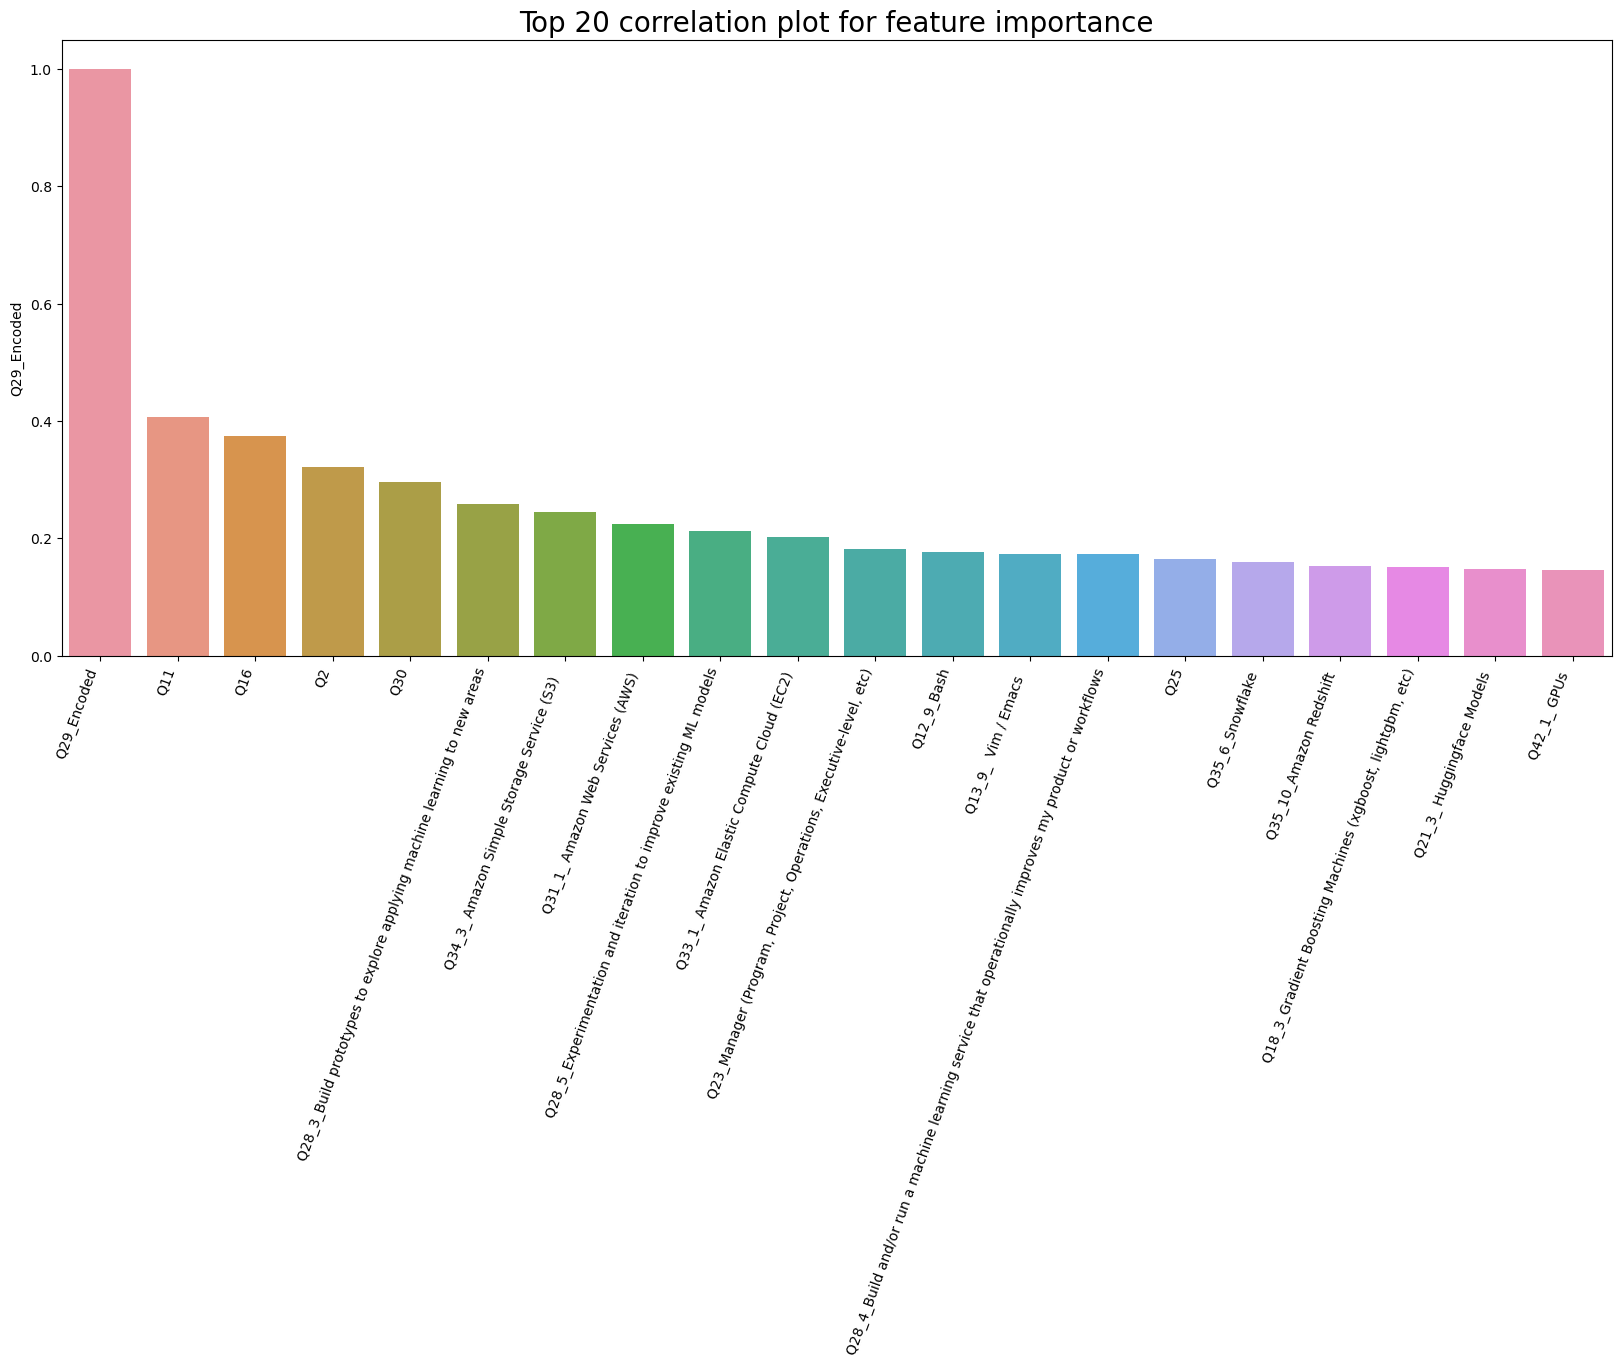

In [55]:
plt.figure(figsize=(20,8))
plt.title('Top 20 correlation plot for feature importance',fontsize = 20)
corrplot = sns.barplot(x=corr_df.head(20).index,y='Q29_Encoded',data=corr_df.head(20))
corrplot.set_xticklabels(corrplot.get_xticklabels(), 
                         rotation=70, 
                         horizontalalignment='right')
corrplot.tick_params(axis='both', which='major', labelsize=10)
plt.show()

### Feature selection using Random Forest

We don't need standardization for Random Forest, which is based on decision tree, because it is not a distance based analysis method.

In [56]:
X = ordinal_df.drop(columns=['Q29_Encoded','Q29_buckets'])
y = ordinal_df.Q29_Encoded.values

In [57]:
estimator = RandomForestClassifier(random_state=1624)
model_rf  = estimator.fit(X, y)

In [58]:
# Calculate feature importances
importances = model_rf.feature_importances_
print(importances.shape)

(289,)


/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


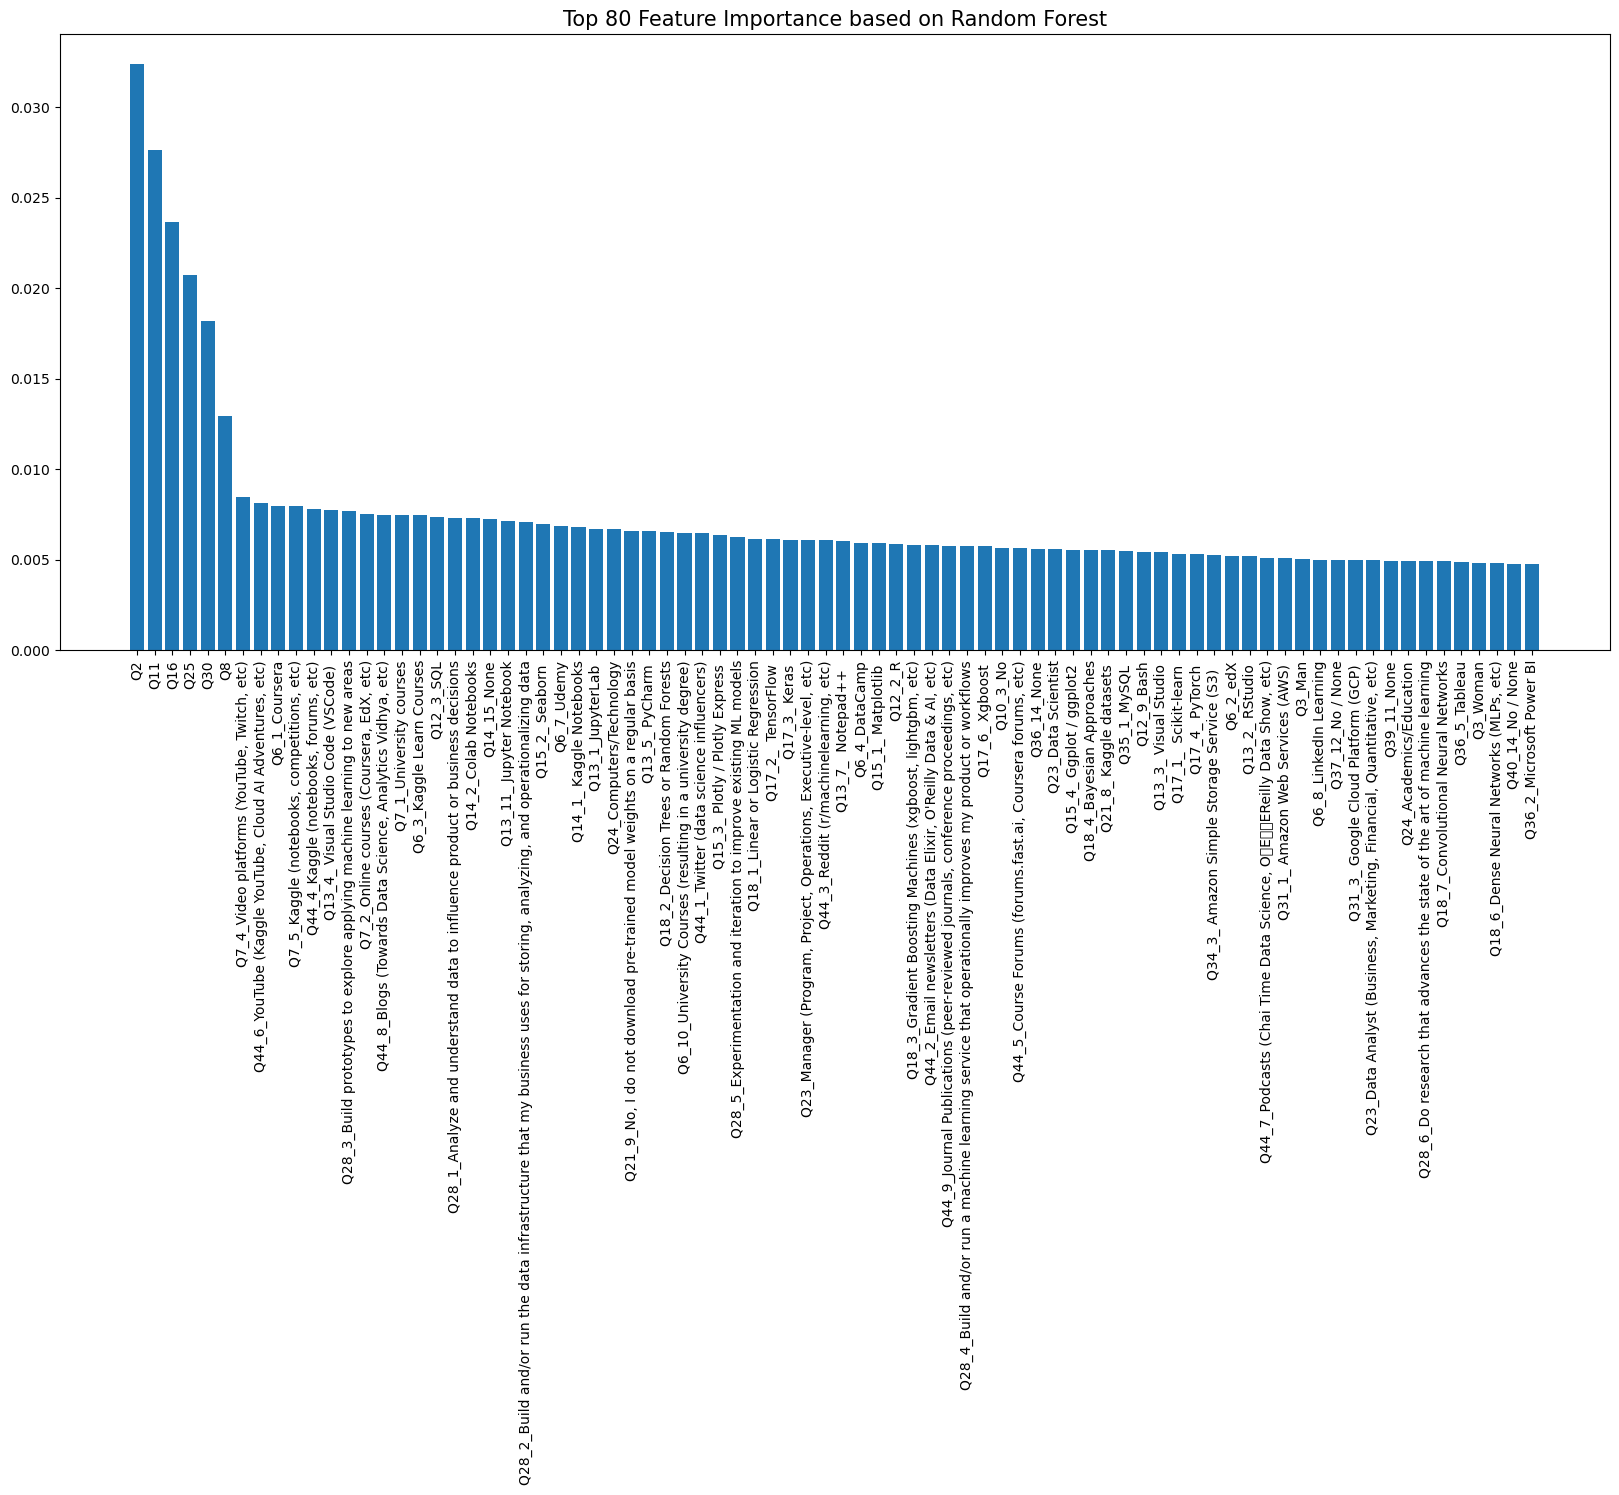

In [59]:
# Sort feature importances in descending order
# importance has 289 values which is too large for barplot, select 30 instead
indices = np.argsort(importances)[::-1]
indices = indices[:80]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,8))
# Create plot title
plt.title("Top 80 Feature Importance based on Random Forest",size=15)
# Add bars
plt.bar(range(80), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(80), names, rotation=90,size=10)
# Show plot
plt.show()

In [60]:
print('Top 80 important feature based on Random Forest:\n',names)

Top 80 important feature based on Random Forest:
 ['Q2', 'Q11', 'Q16', 'Q25', 'Q30', 'Q8', 'Q7_4_Video platforms (YouTube, Twitch, etc)', 'Q44_6_YouTube (Kaggle YouTube, Cloud AI Adventures, etc)', 'Q6_1_Coursera', 'Q7_5_Kaggle (notebooks, competitions, etc)', 'Q44_4_Kaggle (notebooks, forums, etc)', 'Q13_4_ Visual Studio Code (VSCode) ', 'Q28_3_Build prototypes to explore applying machine learning to new areas', 'Q7_2_Online courses (Coursera, EdX, etc)', 'Q44_8_Blogs (Towards Data Science, Analytics Vidhya, etc)', 'Q7_1_University courses', 'Q6_3_Kaggle Learn Courses', 'Q12_3_SQL', 'Q28_1_Analyze and understand data to influence product or business decisions', 'Q14_2_Colab Notebooks', 'Q14_15_None', 'Q13_11_ Jupyter Notebook', 'Q28_2_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Q15_2_ Seaborn ', 'Q6_7_Udemy', 'Q14_1_ Kaggle Notebooks', 'Q13_1_JupyterLab ', 'Q24_Computers/Technology', 'Q21_9_No, I do not download p

### Feature select:
### Retain the top 30 important features from Random Forest.

In [61]:
X_select = X[names]

### Visualize correlation between variables

/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.draw()
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.draw()


<AxesSubplot: >

/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


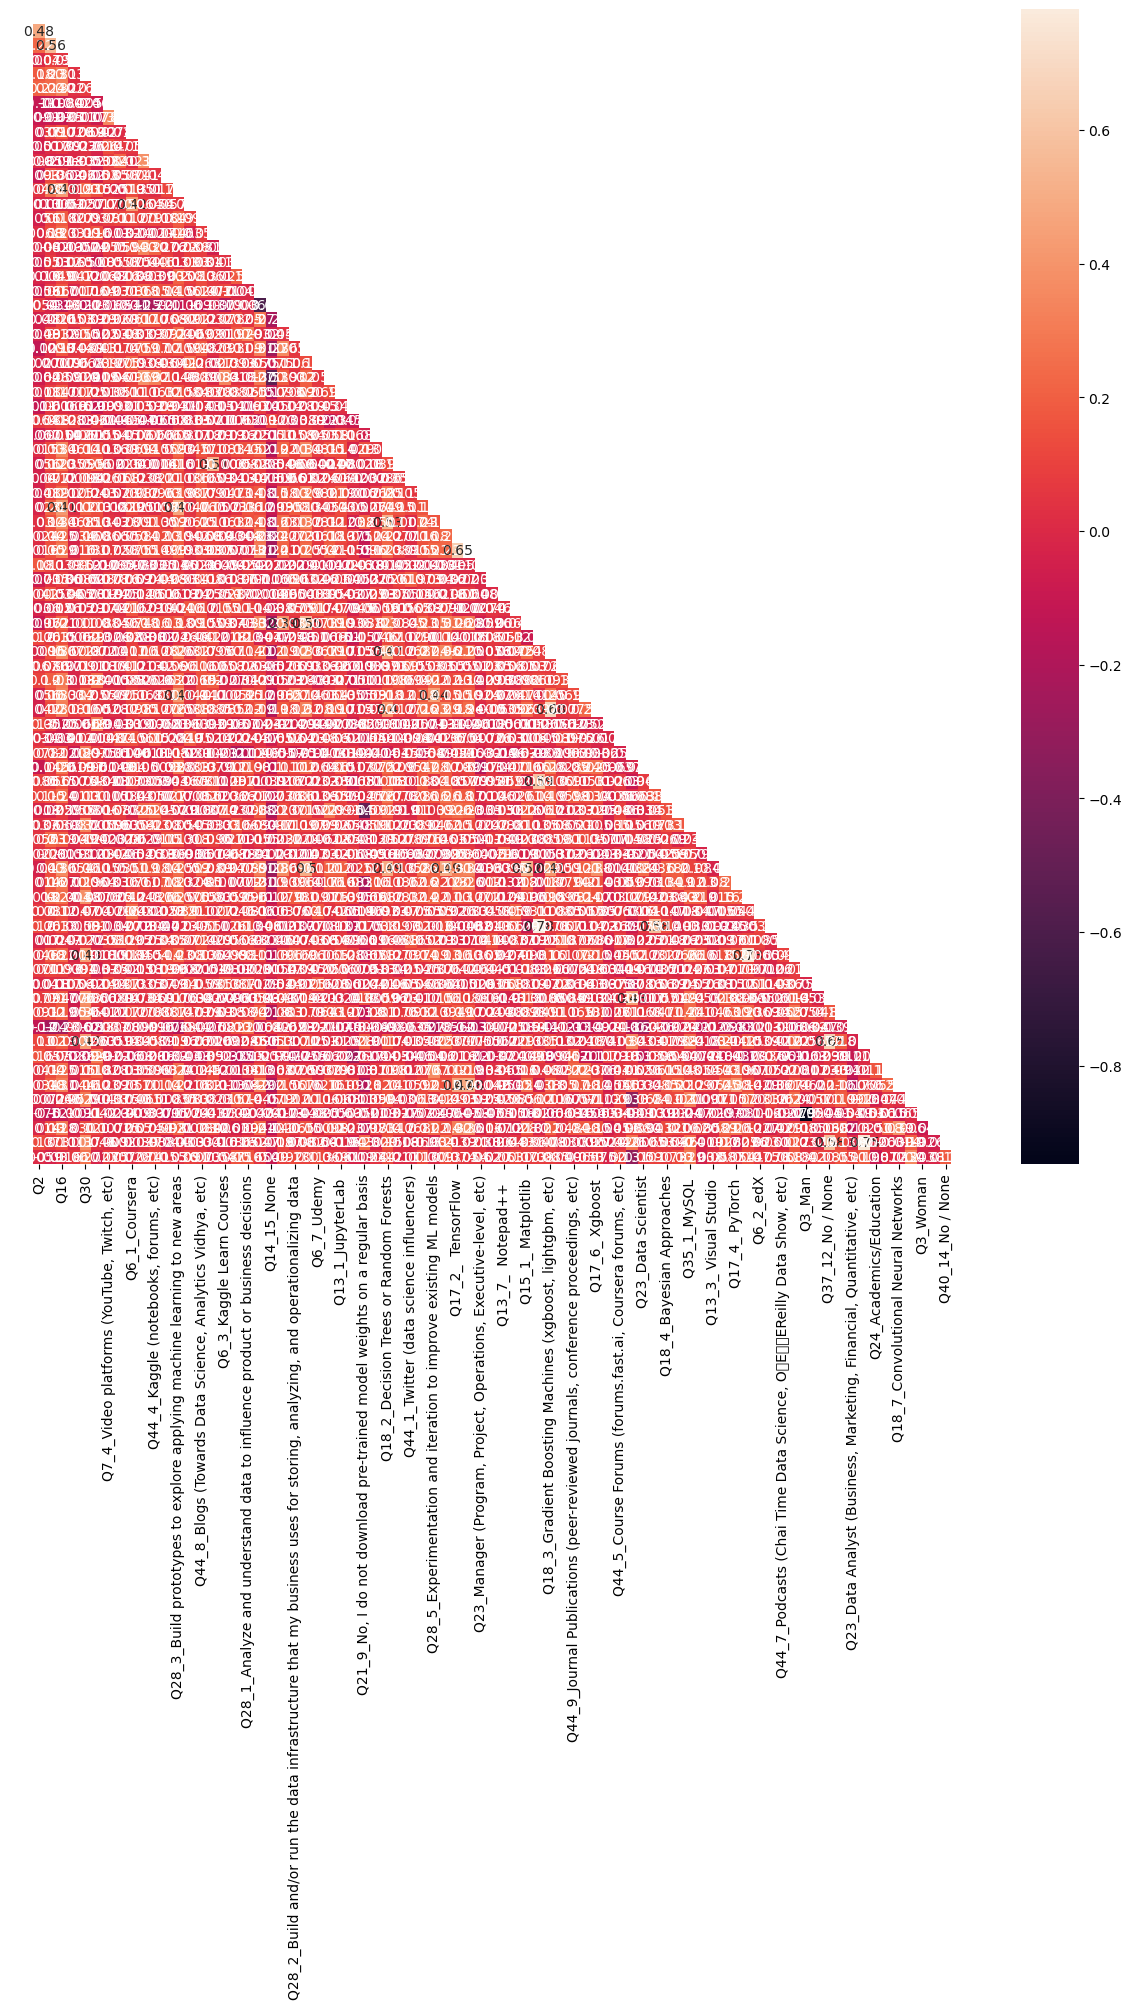

In [62]:
plt.figure(figsize=(15,15))
mask = np.zeros_like(X_select.corr())
mask[np.triu_indices_from(mask)] = True

#fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(X_select.corr(), mask=mask, yticklabels=False, annot=True)

# 3. Model implementation

In [63]:
y = pd.DataFrame(y)

In [64]:
def binary_y (y, num):
    '''
    Given number of classes we want to labeled as 0,
    return modify list y that has only binary values
    '''
    modify_y = []
    for element in y:
        if element <= num:
            modify_y.append(0)
        else:
            modify_y.append(1)
    return modify_y

def ordinal_logistic(X, y, Xp, lr):
    '''
    Given traning dataset and response variable X, y,
    fit ordinal logistic regression on training set,
    and predict class for Xp using the model
    '''
    prob_class = []
    for num_class in range(14):
        y_bi = binary_y(y, num_class)
        lr.fit(X, y_bi)
        prob = lr.predict_proba(Xp)[:,0]
        if num_class == 0:
            # probability for class 0 is prob of 0 here
            p_last = prob
            prob_class.append(prob)
            continue
        else:
            # probability of class num_class is current prob of 0 - last prob of 0
            prob_class.append(prob - p_last)
            p_last = prob
    return np.argmax(prob_class, axis = 0) 


In [65]:
lr = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_select)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X_select):
    X_train, X_test = X_select.values[train_idx], X_select.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    yp = ordinal_logistic(X_train, y_train, X_test, lr)
    
    
#     TN = confusion_matrix(y_test, yp)[0][0]
#     FP = confusion_matrix(y_test, yp)[0][1]
#     FN = confusion_matrix(y_test, yp)[1][0]
#     TP = confusion_matrix(y_test, yp)[1][1]
#     total = TN + FP + FN + TP
#     ACC = (TP + TN) / float(total)
    ACC = accuracy_score(y_test, yp)
    
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC*100,3)))   

print ("Average Accuracy Score across the folds: {}%,\n with a standard deviation of {}%".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 38.298%
Fold 2: Accuracy: 34.326%
Fold 3: Accuracy: 35.887%
Fold 4: Accuracy: 38.44%
Fold 5: Accuracy: 36.879%
Fold 6: Accuracy: 33.617%
Fold 7: Accuracy: 35.319%
Fold 8: Accuracy: 35.461%
Fold 9: Accuracy: 35.035%
Fold 10: Accuracy: 36.222%
Average Accuracy Score across the folds: 35.948%,
 with a standard deviation of 1.49%


### Bias-variance tradeoff based on default solver ’lbfgs’, and different level of C.

In [66]:
mse = []
var = []
bias = []
acc = []
for C in [0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,50,100]:
    m = []
    v = []
    b = []
    a = []
        
    for train_idx, test_idx in kfold.split(X_select):
        X_train, X_test = X_select.values[train_idx], X_select.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]

        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        lr = LogisticRegression(C=C)
        yp = ordinal_logistic(X_train, y_train, X_test, lr)
    
        v.append(np.var(yp))
        b.append(((y_test.reshape(1,len(yp))-yp)**2).mean())
#         TN = confusion_matrix(y_test, yp)[0][0]
#         FP = confusion_matrix(y_test, yp)[0][1]
#         FN = confusion_matrix(y_test, yp)[1][0]
#         TP = confusion_matrix(y_test, yp)[1][1]
#         total = TN + FP + FN + TP
        a.append(accuracy_score(y_test, yp))
#         a.append((TP + TN) / float(total))

    var.append(np.mean(v))
    bias.append(np.mean(b))
    acc.append(np.mean(a))
        

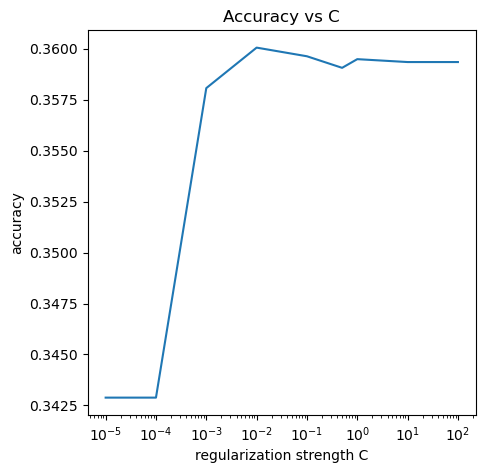

In [67]:
fig = plt.figure(figsize=(5,5))
plt.title('Accuracy vs C')
plt.xlabel('regularization strength C')
plt.ylabel('accuracy')
plt.semilogx([0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,50,100], acc)

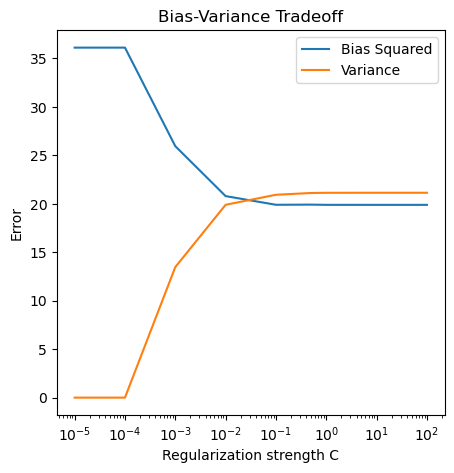

In [68]:
fig = plt.figure(figsize=(5,5))
# plt.plot([0.001,0.005,0.01,0.05,0.1,0.5,1,10], bias, label = 'Bias Squared')
plt.semilogx([0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,50,100], bias, label = 'Bias Squared')
plt.semilogx([0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,50,100], var, label = 'Variance')
# plt.semilogx([0.00001,0.0001,0.001,0.01,0.1,0.5,1,10,50,100], mse, label = 'MSE')
# plt.plot([0.001,0.005,0.01,0.05,0.1,0.5,1], var, label = 'Variance')
# plt.plot([0.001,0.005,0.01,0.05,0.1,0.5,1], mse, label = 'MSE')
plt.xlabel("Regularization strength C")
plt.title("Bias-Variance Tradeoff")
plt.ylabel("Error")
plt.legend(fontsize = 10)
plt.show()

## 4. Model tunning
### Optimize hyperparameter with grid search

In [69]:
class_proportion = y[0].value_counts().values / len(y)
pd.DataFrame([class_proportion], columns=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.342886,0.097177,0.075897,0.05859,0.055043,0.05405,0.047099,0.045964,0.042276,0.037736,0.036459,0.032061,0.028798,0.026812,0.019152


Data is imbalanced, with response variable 0 takes up about 34% of total response. Thus accuracy cannot be a good performance metric, since the model can get a high precision by producing the majority classes.

**Split dataset, use X_train for tunning/model training**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=1624)

In [72]:
lr = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X_select)

best_model = lr
best_params = {}
best_score = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,0.7,0.9,1,3,5]:
#     print(C)
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
#         print(solver)
        lr = LogisticRegression(C=C, solver=solver,random_state=1624)
        accuracy = []
        f1 = []
        m=[]
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X_train):
            X_train1, X_test1 = X_train.values[train_idx], X_train.values[test_idx]
            y_train1, y_test1 = y_train.values[train_idx], y_train.values[test_idx]

            X_train1 = scaler.fit_transform(X_train1)
            X_test1 = scaler.transform(X_test1)

            yp = ordinal_logistic(X_train1, y_train1, X_test1, lr)


            f1.append(f1_score(y_test1, yp, average = 'macro')*100)
            # weighted 0.226 c=10 macro 0.081 c=10
            m.append(metrics.mean_squared_error(y_test1, yp))

            accuracy.append(ACC*100)
            np_idx += 1
#         print(np.mean(f1))
        
#         if np.mean(m) < best_score:
#             best_model = lr
#             best_params = {'C':C, 'solver':solver}
#             best_accuracy = np.mean(m)
#             best_std = np.std(m)
        
        if np.mean(f1) > best_score:
            best_model = lr
            best_params = {'C':C, 'solver':solver}
            best_score = np.mean(f1)
            best_std = np.std(f1)
        
#         if np.mean(accuracy) > best_score:
#             best_model = lr
#             best_params = {'C':C, 'solver':solver}
#             best_score = np.mean(accuracy)
#             best_std = np.std(accuracy)

print (best_params)
print ("Best Score: {}%({}%)".format(round(best_score,3),round(best_std,3)))      

print ("\nThe optimal model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_score,3),round(best_std,3)))

/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'C': 0.9, 'solver': 'liblinear'}
Best Score: 10.59%(0.882%)

The optimal model uses C=0.9, and a liblinear solver, and has a cross validation score of 10.59% with a standard deviation of 0.882%


### Create feature importance
**Split dataset and standardization**

In [73]:
# Create the instance of the scaler
scaler = StandardScaler()
# Transform the inputs X
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tongfeili/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


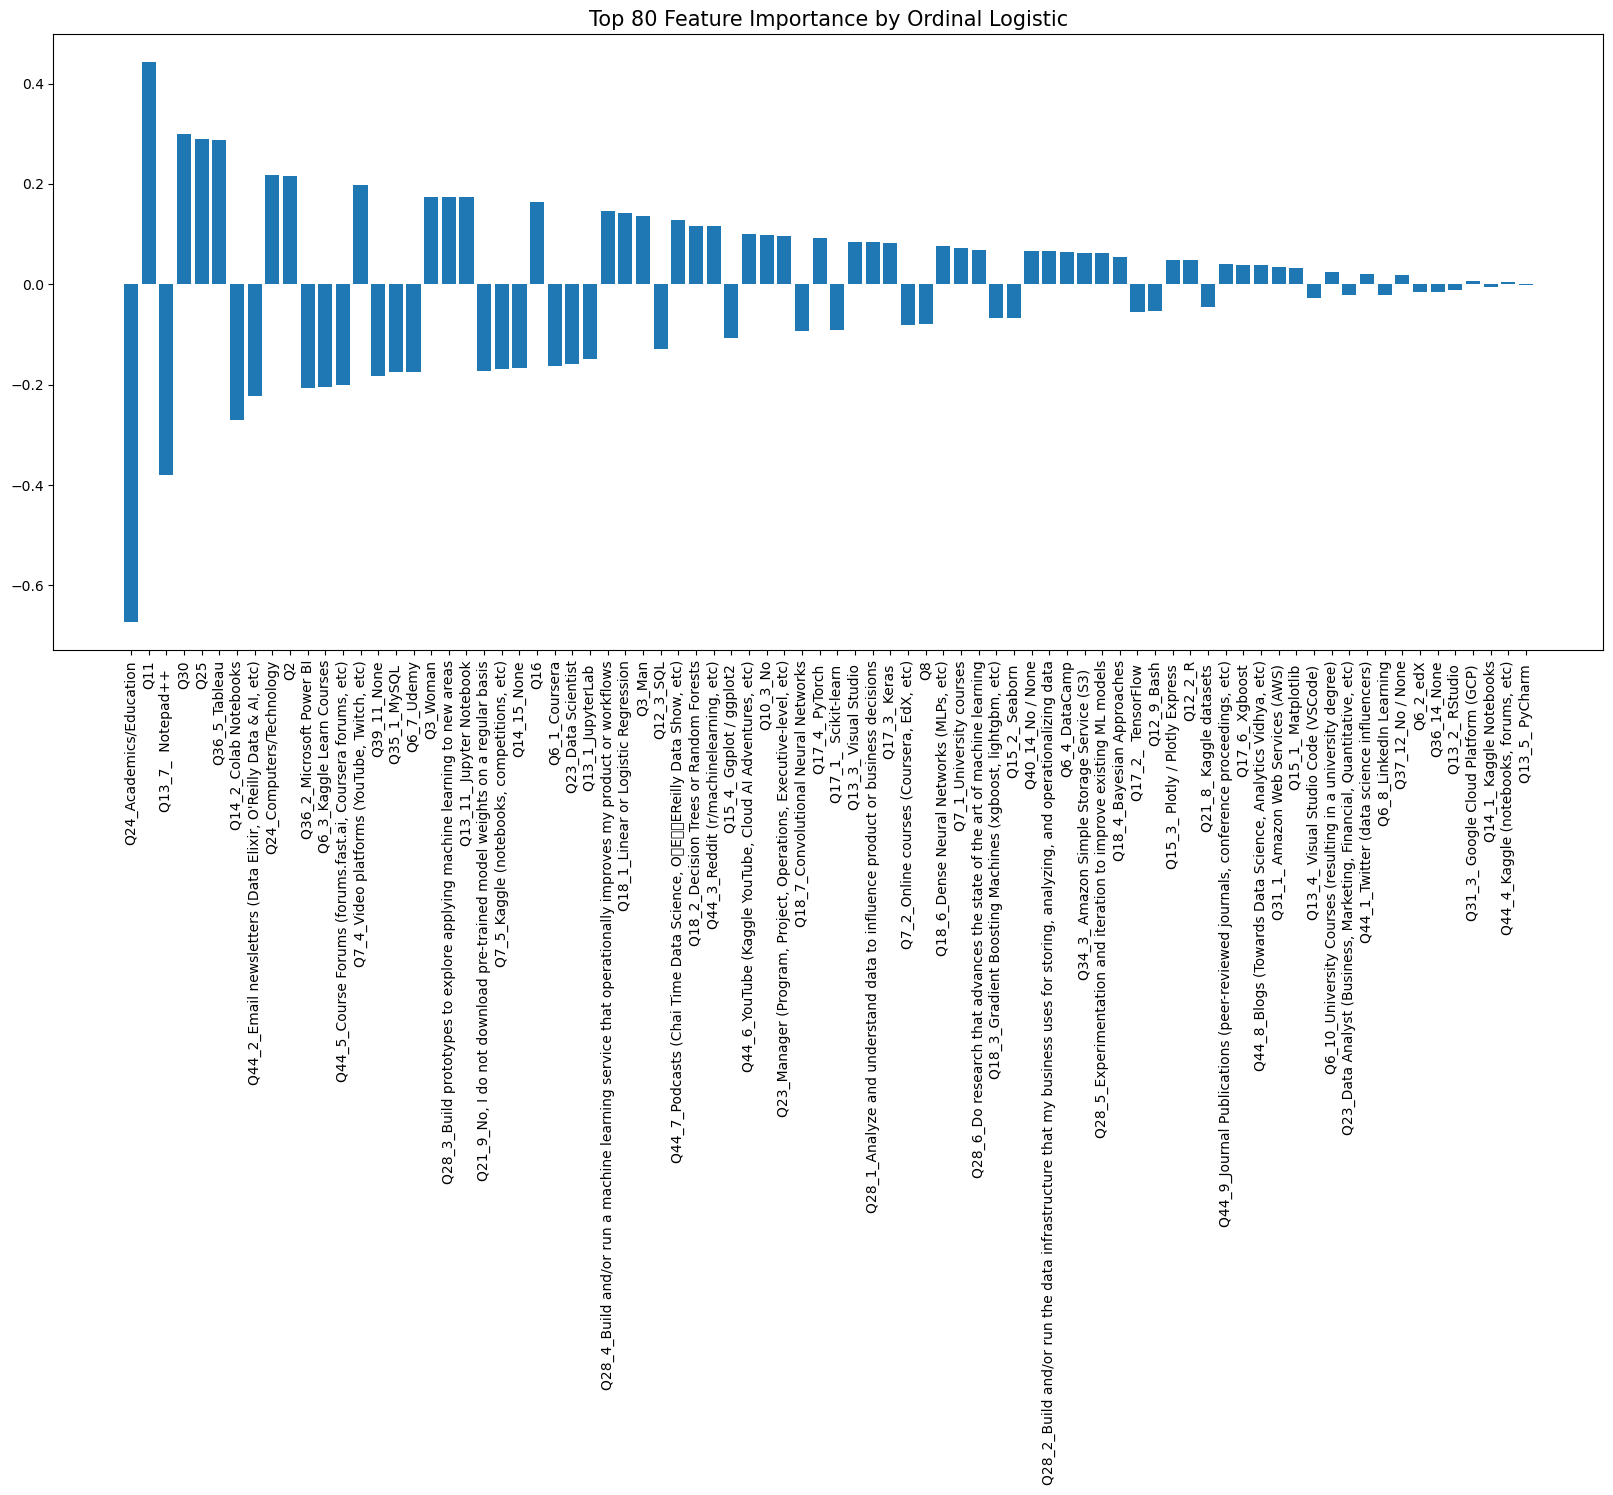

In [74]:
# create and fit best model
model_LR_best = LogisticRegression(C=0.9, solver='liblinear',random_state=1624)
# Fit the model
yp = ordinal_logistic(X_train_scaled, y_train.values, X_test_scaled, model_LR_best)
# coefficients
m = model_LR_best.coef_
abs_m = abs(m)
# intercept
b = model_LR_best.intercept_

# Sort feature importances (absolute of coefficient value) in descending order
# importance has 80 values
indices = np.argsort(abs_m)[0][::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_select.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,8))
# Create plot title
plt.title("Top 80 Feature Importance by Ordinal Logistic",size=15)
# Add bars
plt.bar(range(80), m[0][indices])
# Add feature names as x-axis labels
plt.xticks(range(80), names, rotation=90,size=10)
# Show plot
plt.show()


## 4. Model testing & discussion

In [75]:
model_LR_best = LogisticRegression(C=0.9, solver='liblinear',random_state=1624)
yp_train = ordinal_logistic(X_train_scaled, y_train.values, X_train_scaled, model_LR_best)
yp_test = ordinal_logistic(X_train_scaled, y_train.values, X_test_scaled, model_LR_best)
# F1
f1_train = f1_score(y_train, yp_train, average = 'macro')*100
f1_test = f1_score(y_test, yp_test, average = 'macro')*100

# accuracy
ACCtrain = accuracy_score(y_train, yp_train)
ACCtest = accuracy_score(y_test, yp_test) 

print('F1 score of training dataset is:', round(f1_train,2),'%')
print('F1 score of test dataset is:', round(f1_test,2),'%')
print('Accuracy of training dataset is:', round(ACCtrain*100,2),'%')
print('Accuracy of test dataset is:', round(ACCtest*100,2),'%')

F1 score of training dataset is: 16.96 %
F1 score of test dataset is: 10.47 %
Accuracy of training dataset is: 39.6 %
Accuracy of test dataset is: 35.37 %


In [76]:
acc_train = []
acc_test = []
f1_train = []
f1_test = []
for C in [0.01,0.05,0.1,0.5,0.7,0.8,0.9,1,5,10]:
    lr = LogisticRegression(C=C, solver='liblinear',random_state=1624)

    yp_train = ordinal_logistic(X_train_scaled, y_train.values, X_train_scaled, lr)
    yp_test = ordinal_logistic(X_train_scaled, y_train.values, X_test_scaled, lr)
    # F1
    f1_tr = f1_score(y_train, yp_train, average = 'macro')*100
    f1_te = f1_score(y_test, yp_test, average = 'macro')*100
    f1_train.append(f1_tr)
    f1_test.append(f1_te)
    # accuracy
    ACCtrain = accuracy_score(y_train, yp_train)
    ACCtest = accuracy_score(y_test, yp_test)
    acc_train.append(ACCtrain)
    acc_test.append(ACCtest)



In [77]:
# fig = plt.figure(figsize=(5,5))

# plt.semilogx([0.05,0.1,0.5,0.7,0.8,0.9,1,5,10], acc_train, label = 'f1_train')
# plt.semilogx([0.05,0.1,0.5,0.7,0.8,0.9,1,5,10], acc_test, label = 'f1_test')

# plt.xlabel("C")
# plt.title("F1 score vs C")
# plt.ylabel("F1 score")
# plt.legend(fontsize = 10)
# plt.show()

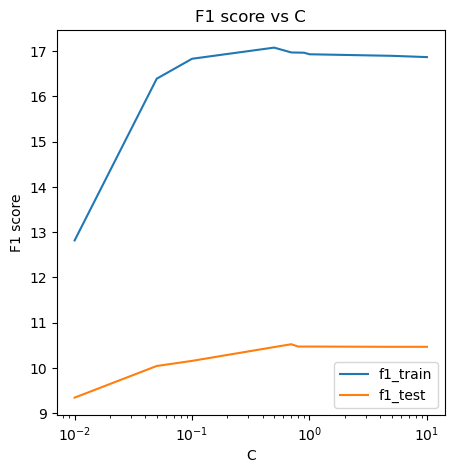

In [78]:
fig = plt.figure(figsize=(5,5))

plt.semilogx([0.01,0.05,0.1,0.5,0.7,0.8,0.9,1,5,10], f1_train, label = 'f1_train')
plt.semilogx([0.01,0.05,0.1,0.5,0.7,0.8,0.9,1,5,10], f1_test, label = 'f1_test')

plt.xlabel("C")
plt.title("F1 score vs C")
plt.ylabel("F1 score")
plt.legend(fontsize = 10)
plt.show()

In [79]:
# print('Training Data:')
# print('Variance:',np.var(np.array(y_train).reshape(1,len(yp_train))-yp_train))
# print('Bias:',((np.array(y_train).reshape(1,len(yp_train))-yp_train)**2).mean())
# print('Test Data:')
# print('Variance:',np.var(yp_test))
# print('Bias:',((np.array(y_test).reshape(1,len(yp_test))-yp_test)**2).mean())

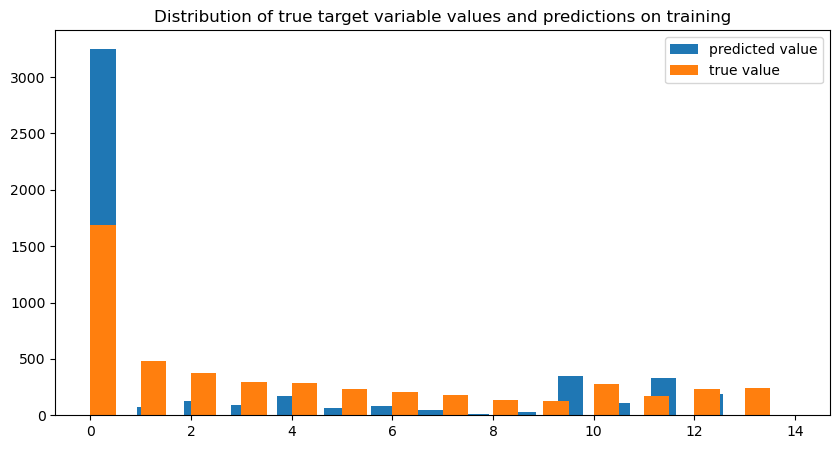

In [80]:
plt.figure(figsize=(10,5))
plt.hist(yp_train,label = 'predicted value',width = 0.5,bins=14)
plt.hist(y_train,label='true value',width = 0.5,bins=14)
plt.title('Distribution of true target variable values and predictions on training')
plt.legend()
plt.show()

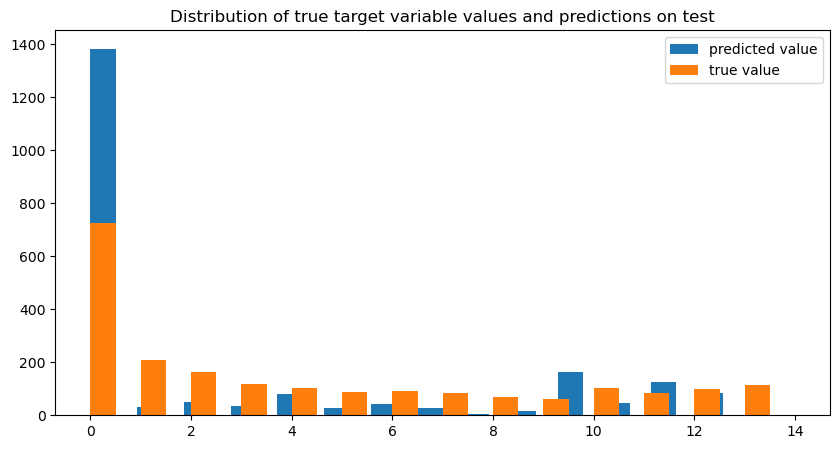

In [81]:
plt.figure(figsize=(10,5))
plt.hist(yp_test,label = 'predicted value',width = 0.5,bins=14)
plt.hist(y_test,label='true value',width = 0.5,bins=14)
plt.title('Distribution of true target variable values and predictions on test')
plt.legend()
plt.show()